In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from pandas import Series, DataFrame
import seaborn as sns
from scipy import stats

In [3]:
#read data
df = pd.read_csv("./heart.csv", sep=",")

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
features = df.drop(columns=['age', 'cp', 'sex', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])

In [9]:
features

,trtbps,chol,thalachh,oldpeak,output
0,145,233,150,2.3,1
1,130,250,187,3.5,1
2,130,204,172,1.4,1
3,120,236,178,0.8,1
4,120,354,163,0.6,1
...,...,...,...,...,...
298,140,241,123,0.2,0
299,110,264,132,1.2,0
300,144,193,141,3.4,0
301,130,131,115,1.2,0


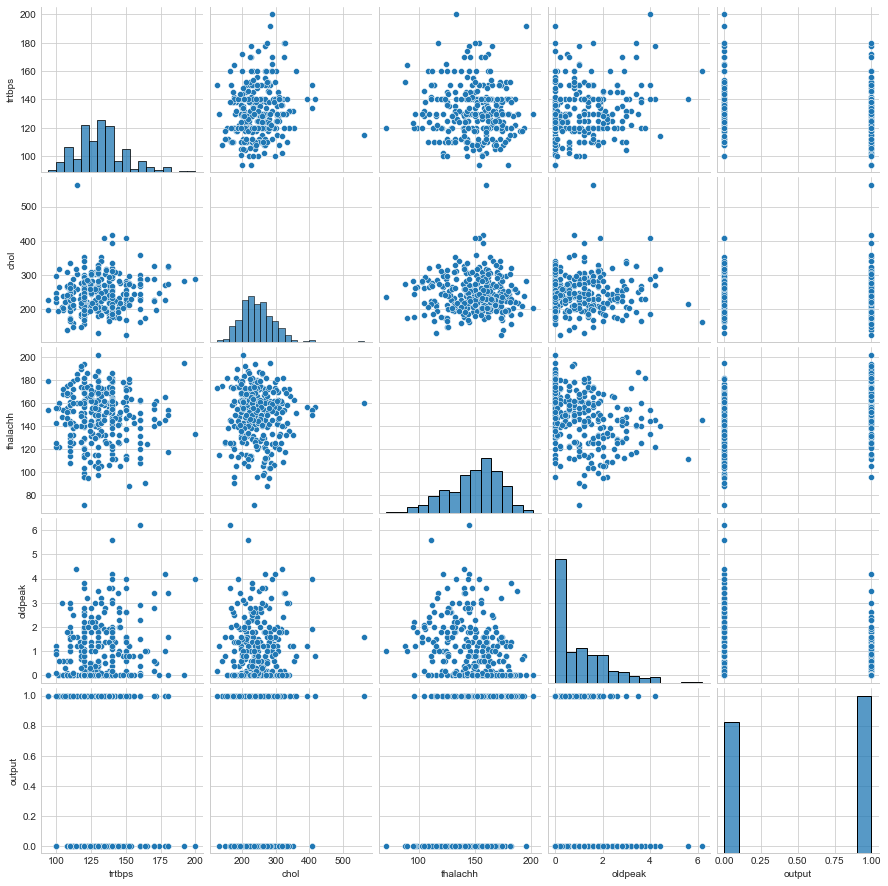

In [10]:
sns.pairplot(features,  diag_kind="hist")

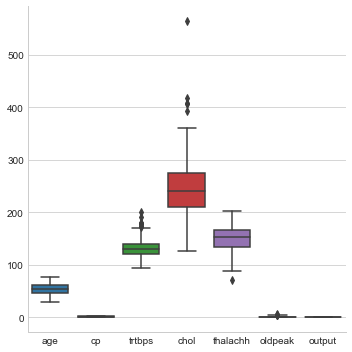

In [9]:
sns.catplot(data=features, kind="box")

C:\Users\alecd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

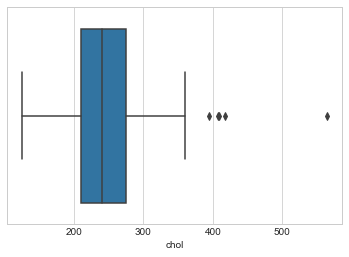

In [10]:
sns.boxplot(features['chol'])

C:\Users\alecd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trtbps'>

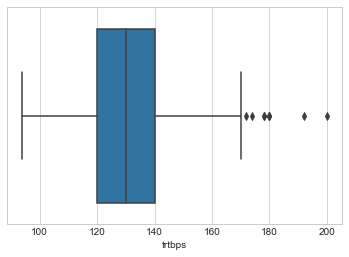

In [11]:
sns.boxplot(features['trtbps'])

C:\Users\alecd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalachh'>

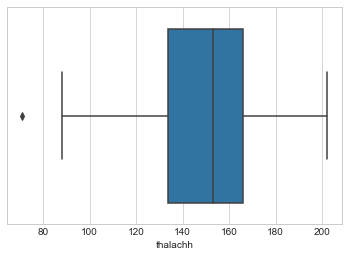

In [12]:
sns.boxplot(features['thalachh'])

In [13]:
outliersChol = np.where(features['chol']>375)
outliersTrtbps = np.where(features['trtbps']>170)
outliersThalachh = np.where(features['thalachh']<85)

In [14]:
outliersChol

(array([ 28,  85,  96, 220, 246], dtype=int64),)

In [15]:
outliersTrtbps

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266], dtype=int64),)

In [16]:
outliersThalachh

(array([272], dtype=int64),)

In [17]:
features.drop(outliersChol[0], inplace = True)
features.drop(outliersTrtbps[0], inplace = True)
features.drop(outliersThalachh[0], inplace = True)

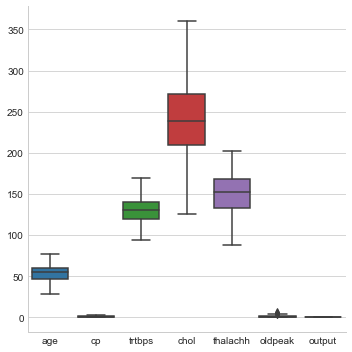

In [18]:
sns.catplot(data=features, kind="box")